In [18]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy
import os
import tensorflow
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
try:
  os.chdir('/content/drive/MyDrive/Colab Notebooks')
  print("directory changed")
except OSError:
  print("Error")

directory changed


In [21]:
df = pd.read_excel('Data/server_log_dataset.xlsx')

In [22]:
data = df.copy()
data.shape

(172838, 16)

<Axes: xlabel='class', ylabel='count'>

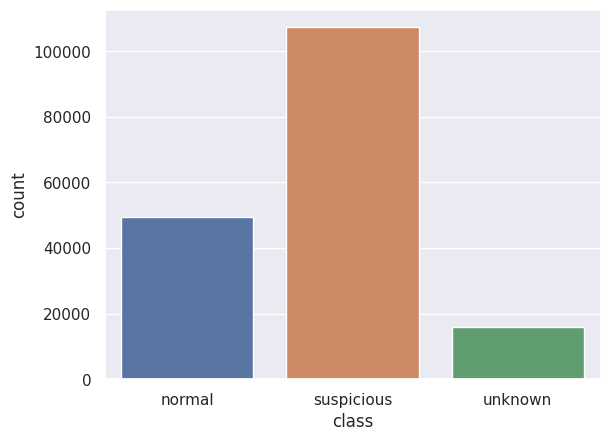

In [23]:
sns.set(style = "darkgrid")
sns.countplot(x = "class",data=data)

In [24]:
df["Flags"].unique()

array(['.AP...', '.AP.S.', '....S.', '.A.R..', '.APRS.', '.APRSF',
       '.AP.SF', '......', '  0xdb', '...RS.', '.A..S.', '.A..SF',
       '.A.RS.', '.A.RSF', '...R..', '.A....', '  0xd2', '.A.R.F',
       '  0xc2', '  0xda', '  0xd7', '  0x53', '  0xdf', '  0xd6',
       '  0xd3'], dtype=object)

In [25]:
df["A"]=0
df["P"]=0
df["S"]=0
df["R"]=0
df["F"]=0
df["x"]=0

In [26]:
def set_flag(data,check):
    val=0;
    if(check in list(data["Flags"])):
        val = 1 ;
    return val;

In [27]:
df.columns

Index(['Date first seen', 'Duration', 'Proto', 'Src IP Addr', 'Src Pt',
       'Dst IP Addr', 'Dst Pt', 'Packets', 'Bytes', 'Flows', 'Flags', 'Tos',
       'class', 'attackType', 'attackID', 'attackDescription', 'A', 'P', 'S',
       'R', 'F', 'x'],
      dtype='object')

In [28]:
df["A"] = df.apply(set_flag,check ="A", axis = 1)
df["P"] = df.apply(set_flag,check = "P" ,axis = 1)
df["S"] = df.apply(set_flag,check ="S",axis = 1)
df["R"] = df.apply(set_flag,check="R" ,axis = 1)
df["F"] = df.apply(set_flag,check ="F" ,axis = 1)
df["x"] = df.apply(set_flag,check ="x" ,axis = 1)

<Axes: xlabel='S', ylabel='count'>

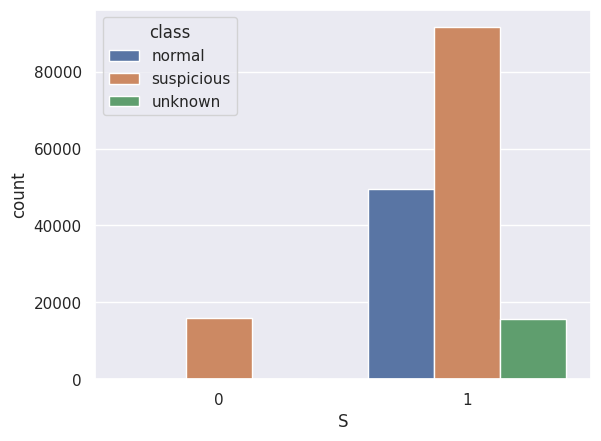

In [29]:
sns.countplot(x="S",hue = "class",data=df)

<Axes: xlabel='Proto', ylabel='count'>

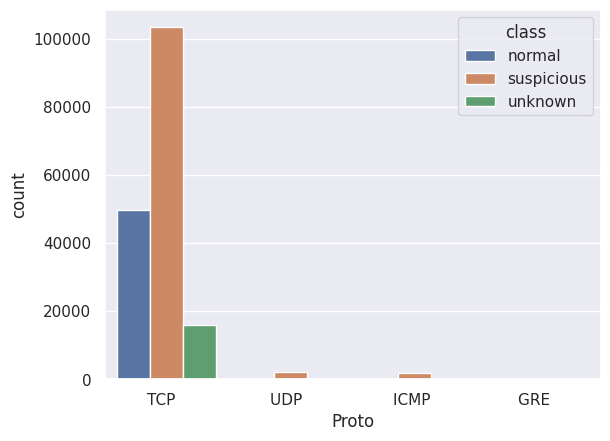

In [30]:
sns.countplot(x = "Proto",hue = "class",data = df)

In [31]:
df=df.drop(columns = ["Date first seen","attackType","attackID","attackDescription","Flows","Tos","Flags"])

In [32]:
df.head()

,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,class,A,P,S,R,F,x
0,81412.697,TCP,EXT_SERVER,8082,OPENSTACK_NET,56978.0,3057,2.1 M,normal,1,1,0,0,0,0
1,81412.697,TCP,OPENSTACK_NET,56978,EXT_SERVER,8082.0,4748,2.5 M,normal,1,1,0,0,0,0
2,81504.787,TCP,EXT_SERVER,8082,OPENSTACK_NET,56979.0,8639,9.1 M,normal,1,1,0,0,0,0
3,81504.787,TCP,OPENSTACK_NET,56979,EXT_SERVER,8082.0,12024,10.3 M,normal,1,1,0,0,0,0
4,82100.692,TCP,EXT_SERVER,8082,OPENSTACK_NET,51649.0,11012,27.2 M,normal,1,1,1,0,0,0


In [38]:
import re
def convtonum(data):
    num1 = data["Bytes"]

    if isinstance(num1, str) and "M" in num1:
        num = re.findall(r'[0-9.]+', num1)  # Extract numeric part
        num1 = float("".join(num)) * 1000000
    elif isinstance(num1, int):
        pass  # Leave integer values as they are
    else:
        raise ValueError("Invalid value in 'Bytes' column")

    return num1


In [39]:
df["Bytes"] = df.apply(convtonum,axis = 1)

In [40]:
df.head()

,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,class,A,P,S,R,F,x
0,81412.697,TCP,EXT_SERVER,8082,OPENSTACK_NET,56978.0,3057,2100000.0,normal,1,1,0,0,0,0
1,81412.697,TCP,OPENSTACK_NET,56978,EXT_SERVER,8082.0,4748,2500000.0,normal,1,1,0,0,0,0
2,81504.787,TCP,EXT_SERVER,8082,OPENSTACK_NET,56979.0,8639,9100000.0,normal,1,1,0,0,0,0
3,81504.787,TCP,OPENSTACK_NET,56979,EXT_SERVER,8082.0,12024,10300000.0,normal,1,1,0,0,0,0
4,82100.692,TCP,EXT_SERVER,8082,OPENSTACK_NET,51649.0,11012,27200000.0,normal,1,1,1,0,0,0


In [41]:
from sklearn.preprocessing import LabelEncoder
col = ["Proto","class","Src IP Addr","Dst IP Addr"]
enc = LabelEncoder()
for col_name in col:
    df[col_name]=enc.fit_transform(df[col_name])

<Axes: >

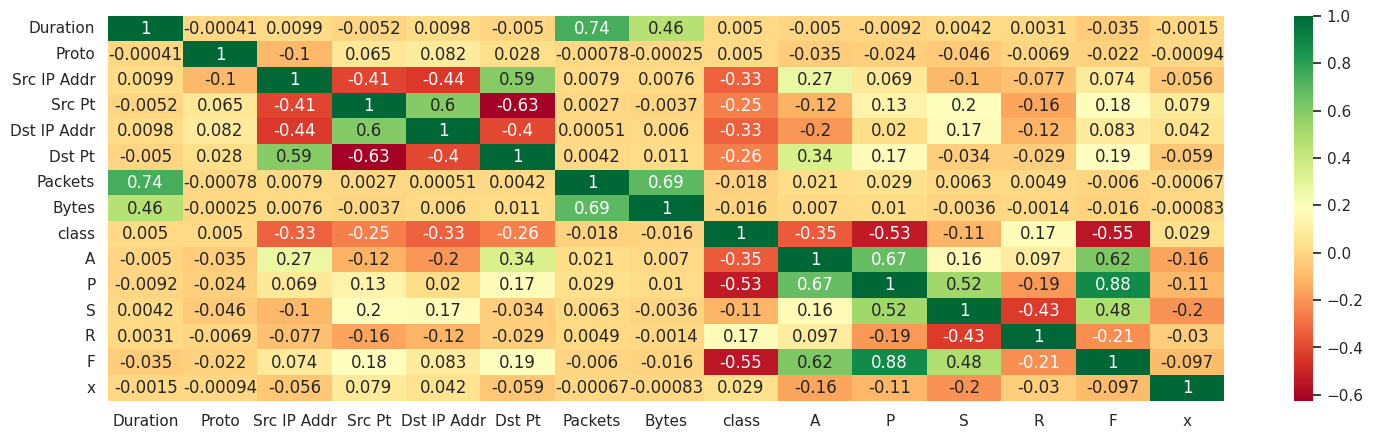

In [42]:
data1 = df.copy()
plt.figure(figsize=(18,5))
sns.heatmap(data1.corr(),annot=True,cmap = "RdYlGn")

In [43]:
data_y = data1["class"]
data_x = data1.drop(columns = ["class"])

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [45]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=10) # you can use GINI index also here as a critirion
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [46]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9995564298387719


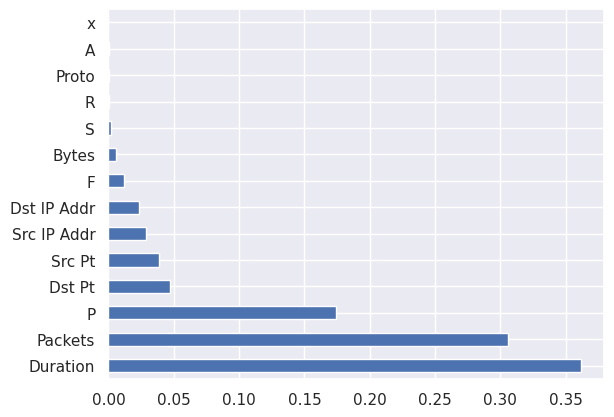

In [47]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [49]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=m, n_features_to_select=8)

# Fit the RFE model
fit = rfe.fit(X_train, y_train)

# Print the results
print(X_train.columns)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Index(['Duration', 'Proto', 'Src IP Addr', 'Src Pt', 'Dst IP Addr', 'Dst Pt',
       'Packets', 'Bytes', 'A', 'P', 'S', 'R', 'F', 'x'],
      dtype='object')
Num Features: 8
Selected Features: [ True False  True  True  True  True  True False False  True False False
  True False]
Feature Ranking: [1 5 1 1 1 1 1 2 6 1 3 4 1 7]
